## Sensor Variables in Data
| Index	| Symbol | Description | Unit |
| --- | --- | --- | --- |
| 1	| T2 | Total | temperature at fan inlet | °R |
| 2	| T24 | Total temperature at LPC outlet | °R |
| 3	| T30 | Total temperature at HPC outlet | °R |
| 4	| T50 | Total temperature at LPT outlet | °R |
| 5	| P2 | Pressure at fan inlet | psia |
| 6	| P15 | Total pressure in bypass-duct | psia |
| 7	| P30 | Total pressure at HPC outlet | psia |
| 8	| Nf | Physical fan speed | rpm |
| 9	| Nc | Physical core speed | rpm |
| 10 | epr | Engine pressure ratio (P50/P2) | — |
| 11 | Ps30 | Static pressure at HPC outlet | psia |
| 12 | phi | Ratio of fuel flow to Ps30 | pps/psi |
| 13 | NRf | Corrected fan speed | rpm |
| 14 | NRc | Corrected core speed | rpm |
| 15 | BPR | Bypass ratio | — |
| 16 | farB | Burner fuel-air ratio | — |
| 17 | htBleed | Bleed enthalpy | — |
| 18 | Nf_dmd | Demanded fan speed | rpm |
| 19 | PCNFR_dmd | Demanded corrected fan speed | rpm |
| 20 | W31	HPT | coolant bleed | lbm/s |
| 21 | W32	LPT | coolant bleed | lbm/s |


In [1]:
from pandas import read_csv, merge
from math import sqrt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
DATA_LABELS = ['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3',
               's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
               's17', 's18', 's19', 's20', 's21']

In [3]:
df = read_csv("Data/train_FD001.txt", delimiter=" ", names=DATA_LABELS, usecols=range(len(DATA_LABELS)))


In [4]:
df.describe()


,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [5]:
stddev_threshold = 0.00001
df_stddev_filtered = df.drop(df.std()[df.std() < stddev_threshold].index.values, axis=1)
df_stddev_filtered


,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [6]:
df1 = merge(df_stddev_filtered, df_stddev_filtered.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')
df1.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
df1['RUL'] = df1['maxcycles'] - df1['cycles']
df1


,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,...,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,...,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,...,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,...,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,200,1


In [7]:
train_x = df1.drop(["unit", "maxcycles", 'RUL'], axis = 1).values
train_x

array([[ 1.00000e+00, -7.00000e-04, -4.00000e-04, ...,  3.92000e+02,
         3.90600e+01,  2.34190e+01],
       [ 2.00000e+00,  1.90000e-03, -3.00000e-04, ...,  3.92000e+02,
         3.90000e+01,  2.34236e+01],
       [ 3.00000e+00, -4.30000e-03,  3.00000e-04, ...,  3.90000e+02,
         3.89500e+01,  2.33442e+01],
       ...,
       [ 1.98000e+02,  4.00000e-04,  0.00000e+00, ...,  3.98000e+02,
         3.84400e+01,  2.29333e+01],
       [ 1.99000e+02, -1.10000e-03,  3.00000e-04, ...,  3.95000e+02,
         3.82900e+01,  2.30640e+01],
       [ 2.00000e+02, -3.20000e-03, -5.00000e-04, ...,  3.96000e+02,
         3.83700e+01,  2.30522e+01]])

In [8]:
df_test = read_csv("Data/test_FD001.txt", delimiter=" ", names=DATA_LABELS, usecols=range(len(DATA_LABELS)))
df_test_stddev_filtered = df_test.drop(df_test.std()[df_test.std() < stddev_threshold].index.values, axis=1)
df_test_stddev_filtered

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [9]:
df_test_stddev_filtered.describe()

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,642.475088,1588.099204,1404.735362,21.609701,553.757523,2388.070964,9058.407363,47.416204,521.747724,2388.071025,8138.947817,8.425844,392.571625,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.400899,5.003274,6.688309,0.001704,0.681286,0.057442,11.436261,0.195917,0.559627,0.056934,10.188605,0.029009,1.233577,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,641.130000,1569.040000,1384.390000,21.600000,550.880000,2387.890000,9024.530000,46.800000,519.380000,2387.890000,8108.500000,8.332800,389.000000,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,642.197500,1584.600000,1399.950000,21.610000,553.310000,2388.030000,9051.020000,47.270000,521.380000,2388.030000,8132.310000,8.405600,392.000000,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,642.460000,1587.990000,1404.440000,21.610000,553.800000,2388.070000,9057.320000,47.410000,521.780000,2388.070000,8138.390000,8.424900,393.000000,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,642.740000,1591.362500,1409.050000,21.610000,554.240000,2388.110000,9064.110000,47.540000,522.150000,2388.110000,8144.360000,8.444300,393.000000,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,644.300000,1607.550000,1433.360000,21.610000,555.840000,2388.300000,9155.030000,48.260000,523.760000,2388.320000,8220.480000,8.541400,397.000000,39.410000,23.641900


In [10]:
df2 = merge(df_test_stddev_filtered, df_test_stddev_filtered.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')
df2.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
df2['RUL'] = df2['maxcycles'] - df2['cycles']
df2

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,...,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31,30
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,...,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31,29
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,...,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31,28
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,...,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31,27
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,...,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,...,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,198,4
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,...,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,198,3
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,...,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,198,2
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,...,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,198,1


In [11]:
df2.describe()

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,RUL
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,...,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,642.475088,1588.099204,1404.735362,21.609701,553.757523,2388.070964,...,47.416204,521.747724,2388.071025,8138.947817,8.425844,392.571625,38.892502,23.335743,152.673030,75.836515
std,28.289423,53.057749,0.002203,0.000294,0.400899,5.003274,6.688309,0.001704,0.681286,0.057442,...,0.195917,0.559627,0.056934,10.188605,0.029009,1.233577,0.141681,0.084120,51.165573,53.057749
min,1.000000,1.000000,-0.008200,-0.000600,641.130000,1569.040000,1384.390000,21.600000,550.880000,2387.890000,...,46.800000,519.380000,2387.890000,8108.500000,8.332800,389.000000,38.310000,22.935400,31.000000,0.000000
25%,28.000000,33.000000,-0.001500,-0.000200,642.197500,1584.600000,1399.950000,21.610000,553.310000,2388.030000,...,47.270000,521.380000,2388.030000,8132.310000,8.405600,392.000000,38.800000,23.281600,125.000000,32.000000
50%,52.000000,69.000000,0.000000,0.000000,642.460000,1587.990000,1404.440000,21.610000,553.800000,2388.070000,...,47.410000,521.780000,2388.070000,8138.390000,8.424900,393.000000,38.900000,23.339200,152.000000,68.000000
75%,76.000000,113.000000,0.001500,0.000300,642.740000,1591.362500,1409.050000,21.610000,554.240000,2388.110000,...,47.540000,522.150000,2388.110000,8144.360000,8.444300,393.000000,38.990000,23.393600,186.000000,112.000000
max,100.000000,303.000000,0.007800,0.000700,644.300000,1607.550000,1433.360000,21.610000,555.840000,2388.300000,...,48.260000,523.760000,2388.320000,8220.480000,8.541400,397.000000,39.410000,23.641900,303.000000,302.000000


In [12]:
test_x = df2.drop(["unit", "maxcycles", 'RUL'], axis = 1)
test_x

,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [13]:
test_x = test_x.values

In [14]:
train_y = df1['RUL'].values
print(train_y)

[191 190 189 ...   2   1   0]


In [15]:
reg = LinearRegression().fit(train_x, train_y)
print(reg.coef_)
print(reg.intercept_)

[-3.99640778e-01 -6.14378103e+01  2.43416877e+03 -5.32978571e+00
 -2.71006100e-01 -4.49405046e-01 -4.89501669e+02  4.19807458e+00
 -2.72972639e+01 -1.64408021e-01 -2.39529116e+01  5.72435199e+00
 -1.96394176e+01 -1.37355741e-01 -7.98539951e+01 -9.77215078e-01
  9.75703300e+00  2.43794617e+01]
125859.99197390235


In [16]:
y_pred = reg.predict(test_x)
print(y_pred)

[182.3970959  188.1565842  174.59104337 ...  35.28571796  32.52945016
  16.323466  ]


In [17]:
max_cycles = df_test_stddev_filtered[df_test_stddev_filtered.groupby(['unit'])['cycles'].transform(max) == df_test_stddev_filtered['cycles']]
max_cycles_for_prediction = max_cycles.drop(["unit"], axis = 1)
max_cycles_for_prediction

,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
30,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
79,49,0.0018,-0.0001,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
205,126,-0.0016,0.0004,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
311,106,0.0012,0.0004,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
409,98,-0.0013,-0.0004,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12545,97,-0.0006,0.0003,642.30,1590.88,1397.94,21.61,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606
12679,134,0.0013,-0.0001,642.59,1582.96,1410.92,21.61,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953
12800,121,0.0017,0.0001,642.68,1599.51,1415.47,21.61,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608
12897,97,0.0047,-0.0000,642.00,1585.03,1397.98,21.61,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595


In [18]:
prediction = reg.predict(max_cycles_for_prediction.values)
print(prediction)

[170.80879525 138.04890363  84.97907873 102.02263224 113.25074231
 113.87725056 103.18091338  74.56724149 131.76518741  80.53088358
 108.99944154  70.91422286  69.32535166 133.44026928 152.06423839
 125.32579944  73.34271862  79.42330893 107.30006038  23.63803382
 102.47697704 154.21289528 129.11919926  36.68927983 148.67838975
 146.38462599 107.22178601  88.39847536  93.7378351   87.46500199
  13.59668468  94.94524785 130.56069196   3.55990991   2.37088315
  54.99212161  82.63657802  76.25253208 170.11068443  53.74616072
  88.81775667  41.41713865  65.24487342 135.21009033  75.21072615
  67.8912695  128.19107804 124.61168466 -24.90944282 134.37339691
 100.36522674  43.60286188  50.10600314 141.88156468 126.52204008
  47.38195326  84.53776776  53.97317124 149.74370432  96.62678108
  53.76220029  48.57899794  69.88373073  56.10772508 169.39779382
  30.83441972 145.25541908  16.94998182 142.63024249  89.53492946
 146.00706118  91.71384754 139.26336111  92.27607738 139.27900905
   0.57364

<AxesSubplot:xlabel='[RUL]', ylabel='[prediction]'>

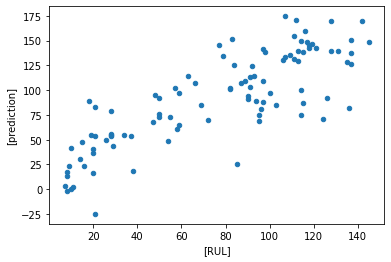

In [19]:
rul = read_csv("Data/RUL_FD001.txt", names=["RUL"])
rul['prediction'] = prediction
rul.plot(x=['RUL'], y=['prediction'], kind="scatter")

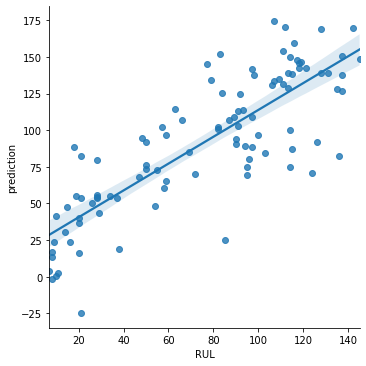

In [20]:
sns.lmplot(x='RUL',y='prediction',data=rul,fit_reg=True)

In [21]:
sqrt(mean_squared_error(rul['RUL'], rul['prediction']))


31.250474117635168

In [22]:
rul.describe()


,RUL,prediction
count,100.00000,100.000000
mean,75.52000,91.457453
std,41.76497,46.736290
min,7.00000,-24.909443
25%,32.75000,54.972821
50%,86.00000,91.994962
75%,112.25000,133.673551
max,145.00000,174.571938


In [23]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(12, input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

print(model.summary())
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                228       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
645/645 [==============================] - 0s 688us/step - loss: 3481.9761
Epoch 2/100
645/645 [==============================] - 0s 671us/step - loss: 2118.3989
Epoch 3/100
645/645 [==============================] - 0s 670us/step - loss: 2097.8489
Epoch 4/100
645/645 [==============================] - 0s 671us/step - loss: 2090.5505
Epoch 5/100
645/645 [==============

In [24]:
ypred = model.predict(test_x)

In [25]:
keras_prediction = model.predict(max_cycles_for_prediction.values)

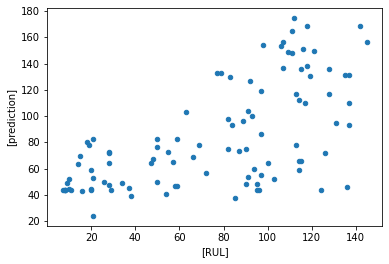

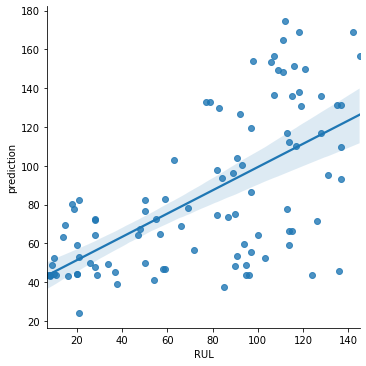

In [26]:
rul = read_csv("Data/RUL_FD001.txt", names=["RUL"])
rul['prediction'] = keras_prediction
rul.plot(x=['RUL'], y=['prediction'], kind="scatter")
sns.lmplot(x='RUL',y='prediction',data=rul,fit_reg=True)

In [27]:
sqrt(mean_squared_error(rul['RUL'], rul['prediction']))

36.15120409102734